<a href="https://colab.research.google.com/github/lorettarehm/AIML/blob/main/1_Iris_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

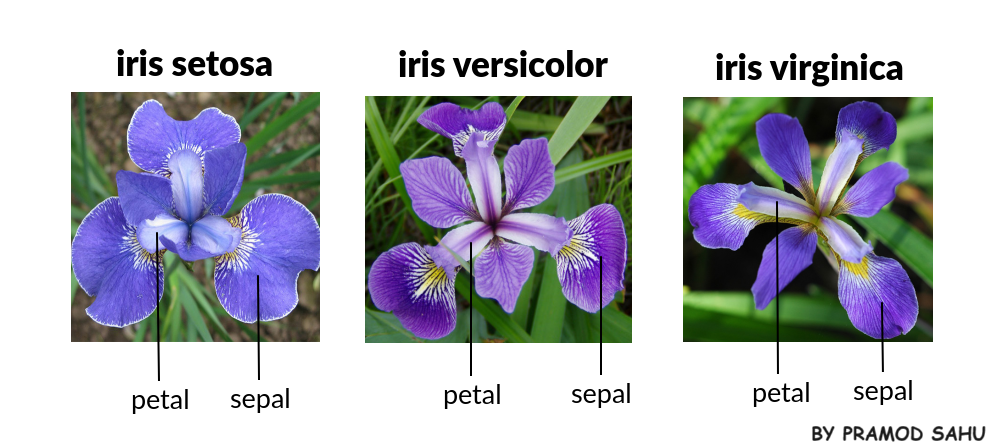

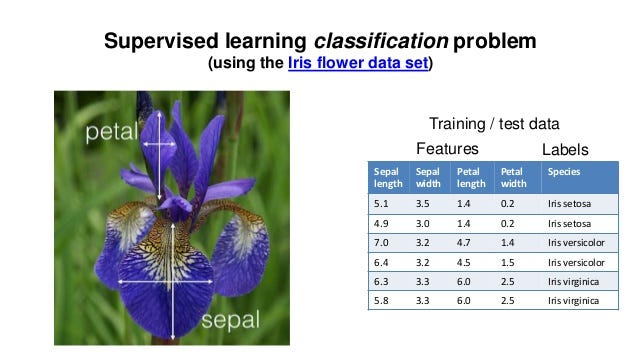

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- 1. Understand the Dataset ---
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# Describe the dataset
print("\nDescription of the dataset:")
print(df.describe())


Description of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


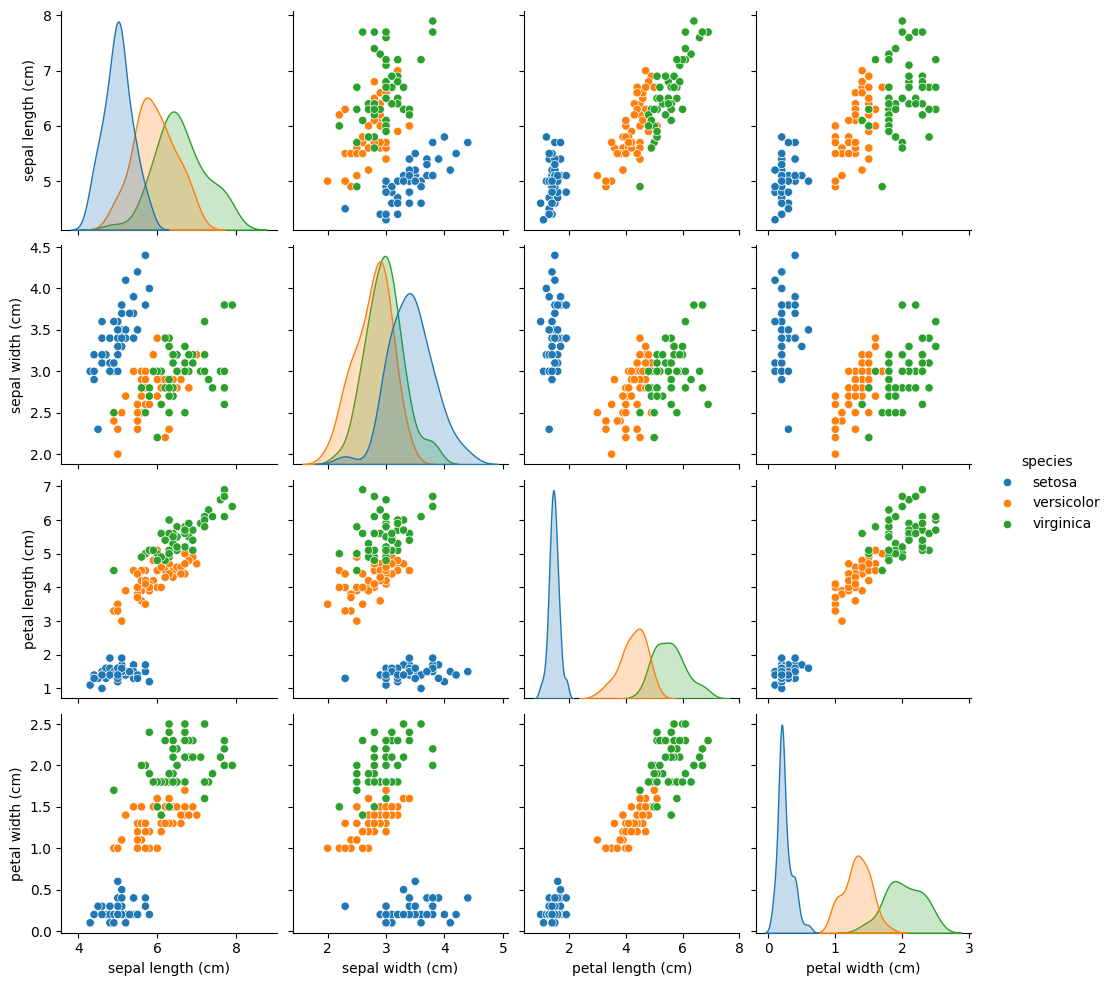

In [ ]:
# Visualize the data using pair plots
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
# --- 2. Engineer Features ---
# Create new features: sepal area and petal area
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

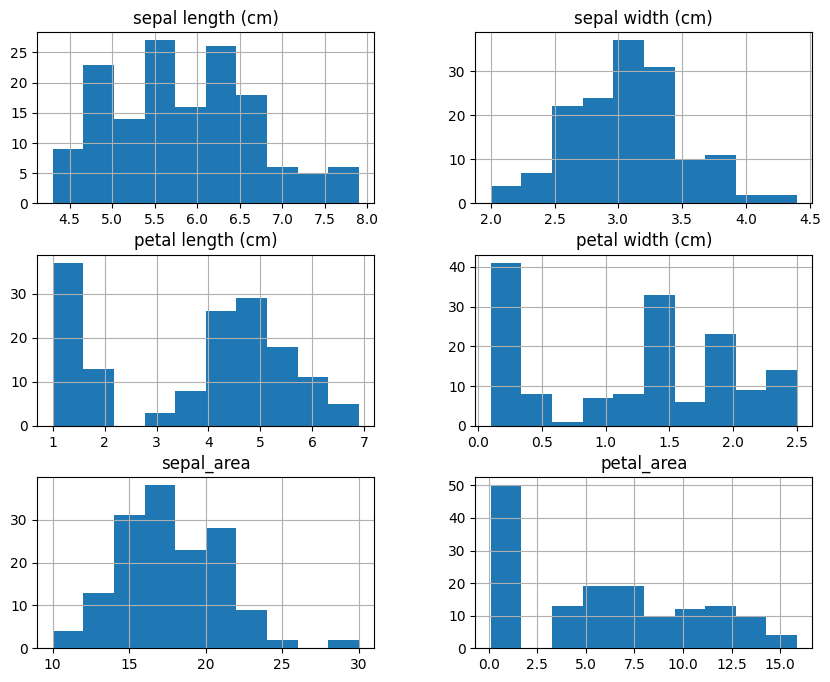

In [ ]:
# --- 3. Transform Variables (if needed) ---
# Check the distribution of features (e.g., using histograms)
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
# Apply transformations if necessary (e.g., log transformation for skewed data)
# (This step is optional and depends on the distribution of the features)

# --- 4. Scale Features ---
# Choose a scaling method (MinMaxScaler or StandardScaler)
scaler = MinMaxScaler()  # Example using MinMaxScaler

In [ ]:
# Apply scaling to selected features
features_to_scale = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_area', 'petal_area']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [ ]:
# --- 5. Encode Labels ---
# Apply label encoding to the 'species' column
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

In [ ]:
# --- 6. One-Hot Encoding ---
# Apply one-hot encoding to the 'species' column
onehot_encoder = OneHotEncoder(sparse=False)
species_encoded = onehot_encoder.fit_transform(df[['species']])
species_encoded_df = pd.DataFrame(species_encoded, columns=onehot_encoder.categories_[0])
df = pd.concat([df, species_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# --- Comparison ---
print("\nDataFrame with label encoding:")
print(df[['species', 'species_encoded']].head())

print("\nDataFrame with one-hot encoding:")
print(df[['species'] + list(onehot_encoder.categories_[0])].head())


DataFrame with label encoding:
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0

DataFrame with one-hot encoding:
  species  setosa  versicolor  virginica
0  setosa     1.0         0.0        0.0
1  setosa     1.0         0.0        0.0
2  setosa     1.0         0.0        0.0
3  setosa     1.0         0.0        0.0
4  setosa     1.0         0.0        0.0


In [ ]:
# --- Further Exploration ---
# Analyze the transformed data and explore relationships between features
# Consider using different scaling methods or transformations
# Build machine learning models using the engineered features
